In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('3416_20220117.csv', encoding='cp949') # cp949 가 더 최신
data1 = data.sort_values(by='일자', ascending=True)
data1

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
6765,1995/05/02,119500,-1000,-0.83,121000,121000,118500,139560,16676735000,6497053077500,54368645
6764,1995/05/03,123500,4000,3.35,119500,126500,119500,382980,47649710000,6714527657500,54368645
6763,1995/05/04,122500,-1000,-0.81,124000,124500,122000,175590,21609210000,6660159012500,54368645
6762,1995/05/06,122000,-500,-0.41,122000,123500,122000,47440,5810535000,6632974690000,54368645
6761,1995/05/08,121000,-1000,-0.82,122000,122000,120500,91810,11127115000,6578606045000,54368645
...,...,...,...,...,...,...,...,...,...,...,...
4,2022/01/11,78900,900,1.15,78400,79000,78000,13221123,1038834579600,471015843195000,5969782550
3,2022/01/12,78900,0,0.00,79500,79600,78600,11000502,868910854000,471015843195000,5969782550
2,2022/01/13,77900,-1000,-1.27,79300,79300,77900,13889401,1088598373464,465046060645000,5969782550
1,2022/01/14,77300,-600,-0.77,77700,78100,77100,10096725,781574668408,461464191115000,5969782550


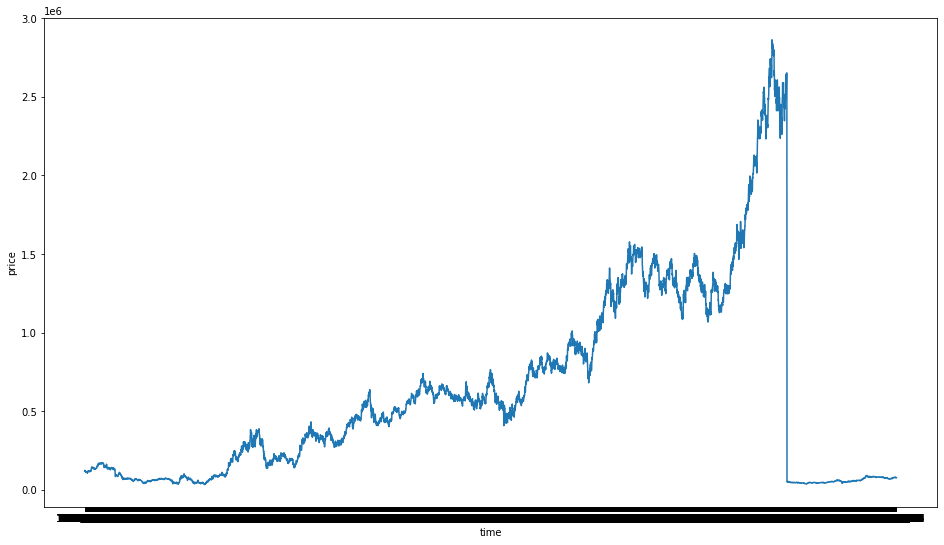

In [10]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=data1['일자'], y=data1['종가'])
plt.xlabel('time')
plt.ylabel('price')
plt.show()
                    

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['시가', '고가', '저가', '종가', '거래량']
df_scaled = scaler.fit_transform(data1[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,시가,고가,저가,종가,거래량
0,0.042087,0.042072,0.041755,0.030484,0.001545
1,0.041565,0.043985,0.042107,0.031899,0.004241
2,0.043130,0.043289,0.042988,0.031545,0.001944
3,0.042435,0.042942,0.042988,0.031368,0.000525
4,0.042435,0.042420,0.042459,0.031015,0.001017
...,...,...,...,...,...
6761,0.027270,0.027469,0.027484,0.016126,0.146403
6762,0.027652,0.027677,0.027696,0.016126,0.121813
6763,0.027583,0.027573,0.027449,0.015773,0.153803
6764,0.027026,0.027156,0.027167,0.015560,0.111805


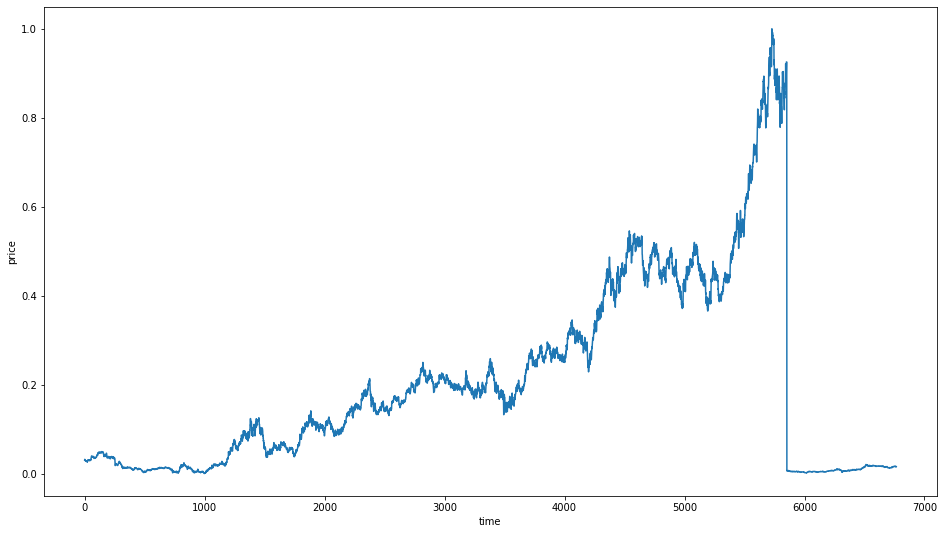

In [13]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=df_scaled.index, y=df_scaled['종가'])
plt.xlabel('time')
plt.ylabel('price')
plt.show()
           